<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [15]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go

font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)
warnings.filterwarnings(action="ignore")
if int(str(sns.__version__).split('.')[1]) > 8 :
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)

Populating the interactive namespace from numpy and matplotlib


In [3]:
t0 = time.time()        
donnees=pd.read_csv("../donnees/DigitRecognizer.csv")#,nrows=1000)
t1 = time.time()        
print('Exécution  :'+('%.2fs' % (t1 - t0)).lstrip('0'))
donnees.head()

Exécution  :4.86s


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def afficheDigits(donnees,simg):
    plt.figure(1, figsize=(8, 8))
    plt.clf()
    plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.91)
    for i in range(36):
        plt.subplot(6, 6, i + 1)
        plt.imshow(donnees.iloc[i,:].values.reshape((simg, simg)), cmap=plt.cm.gray, vmax=16, interpolation='nearest')
        plt.xticks(())
        plt.yticks(())

Exécution  :5.93s
Composants = 320


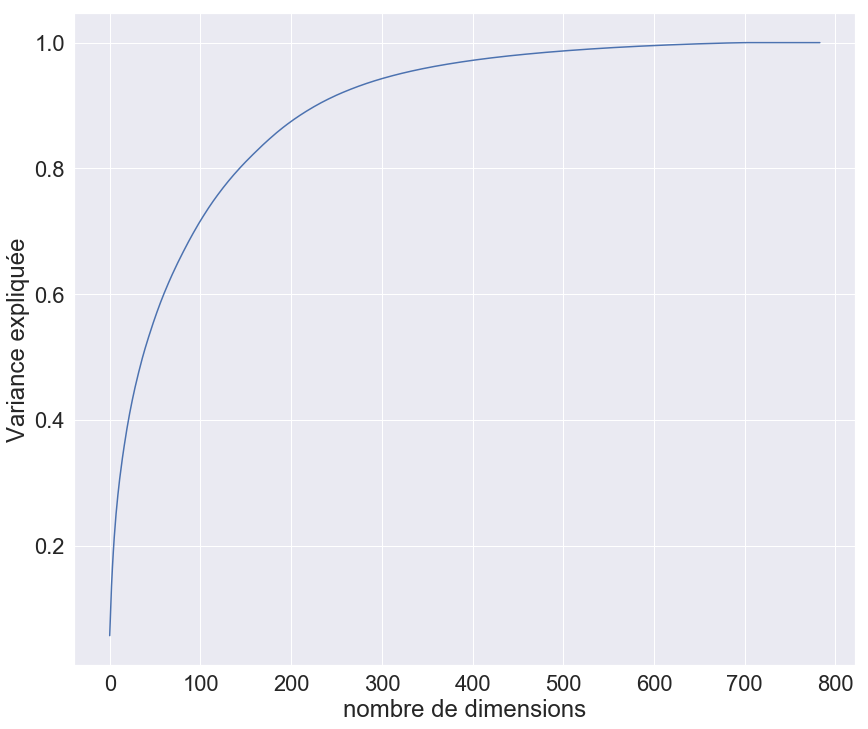

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
t0 = time.time()        
pca = PCA().fit(StandardScaler().fit_transform(donnees.iloc[:,1:]))
plt.figure(figsize=(14,12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de dimensions')
plt.ylabel('Variance expliquée')
t1 = time.time()        
print('Exécution  :'+('%.2fs' % (t1 - t0)).lstrip('0'))
print('Composants =',sum(pca.explained_variance_ratio_.cumsum()*100 < 95 ) + 1 )

Exécution  :4.53s
Composants = 154


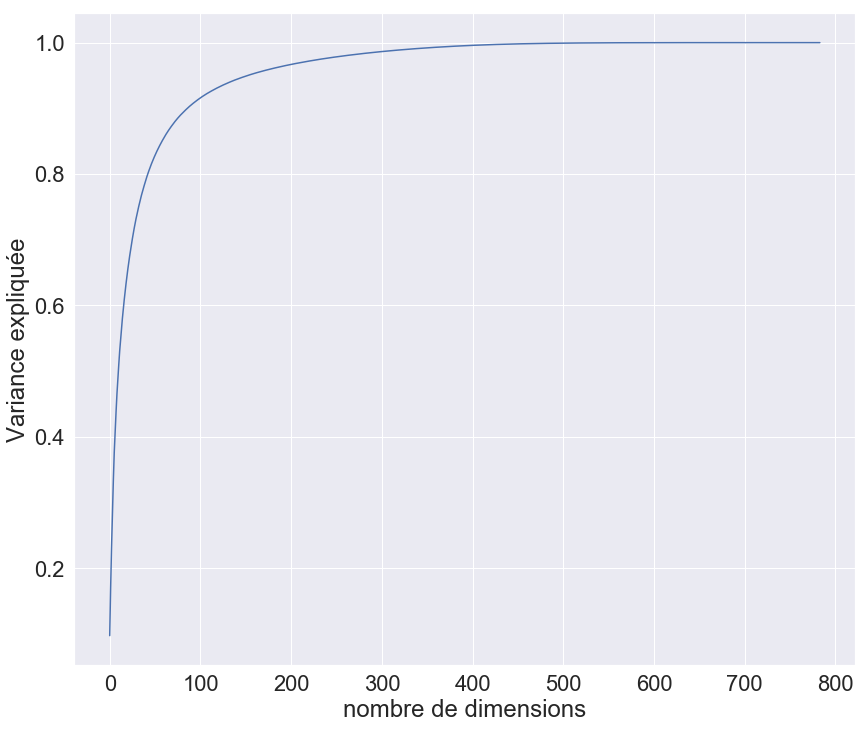

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
t0 = time.time()        
pca = PCA().fit(MinMaxScaler().fit_transform(donnees.iloc[:,1:]))
plt.figure(figsize=(14,12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de dimensions')
plt.ylabel('Variance expliquée')
t1 = time.time()        
print('Exécution  :'+('%.2fs' % (t1 - t0)).lstrip('0'))
print('Composants =',sum(pca.explained_variance_ratio_.cumsum()*100 < 95 ) + 1 )

Exécution  :3.66s
Composants = 154


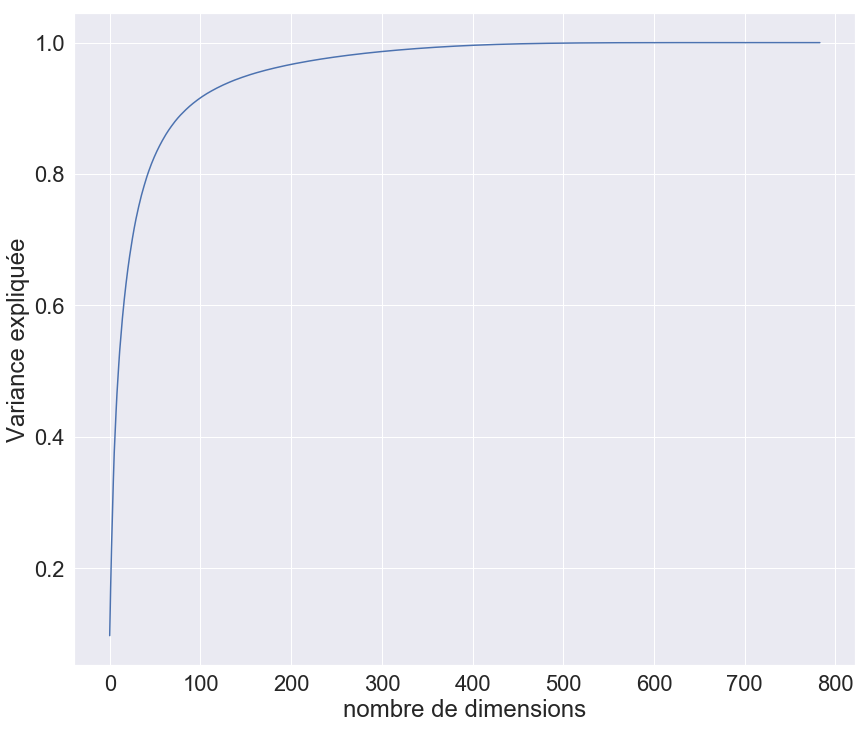

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
t0 = time.time()        
pca = PCA().fit(donnees.iloc[:,1:])
plt.figure(figsize=(14,12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de dimensions')
plt.ylabel('Variance expliquée')
t1 = time.time()        
print('Exécution  :'+('%.2fs' % (t1 - t0)).lstrip('0'))
print('Composants =',sum(pca.explained_variance_ratio_.cumsum()*100 < 95 ) + 1 )

In [7]:
t0 = time.time()        
ndim = 169
pca = PCA(ndim) 
projected = pca.fit_transform(donnees.iloc[:,1:])
print(donnees.shape)
print(projected.shape)
t1 = time.time()        
print(('Exécution  : %.2fs' % (t1 - t0)).lstrip('0'))

(42000, 785)
(42000, 169)
Exécution  : 4.61s


In [8]:
label = donnees.label
donneesR = pd.DataFrame(donnees.drop(columns='label'),
                        index=donnees.index)
donneesP = pd.DataFrame(projected,index=donnees.index)
#projected['label'] = donnees.label
donneesR.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
label.shape

(42000,)

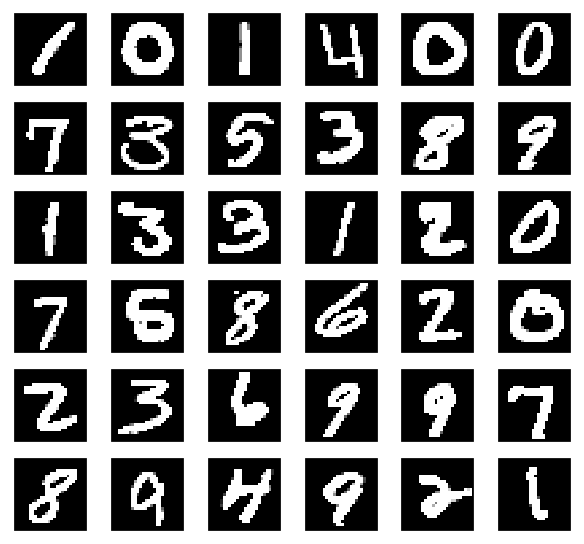

In [10]:
afficheDigits(donneesR,28)

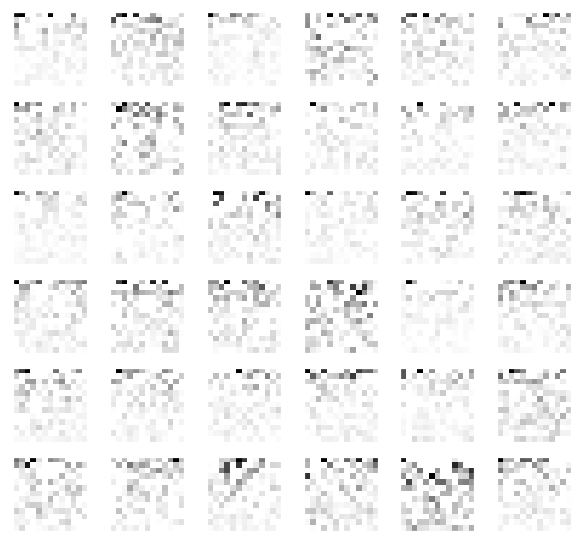

In [11]:
afficheDigits(donneesP,13)

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=50)

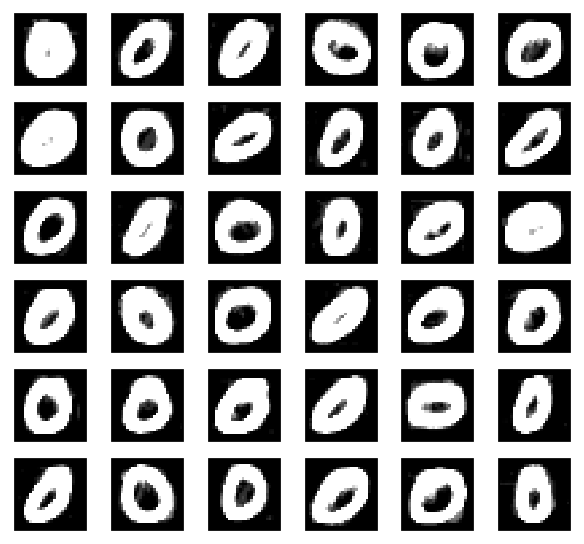

In [13]:
val = 0 
kmeans.fit(donnees[donnees.label == val].iloc[:,1:])
donneesKM0 = pd.DataFrame(kmeans.cluster_centers_)
donneesKM0['label'] = val
afficheDigits(donneesKM0.iloc[:,1:],28)

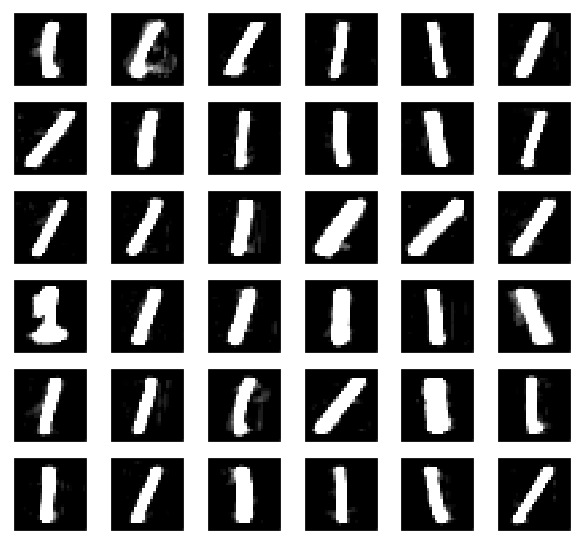

In [14]:
val = 1 
kmeans.fit(donnees[donnees.label == val].iloc[:,1:])
donneesKM1 = pd.DataFrame(kmeans.cluster_centers_)
donneesKM1['label'] = val
afficheDigits(donneesKM1.iloc[:,1:],28)

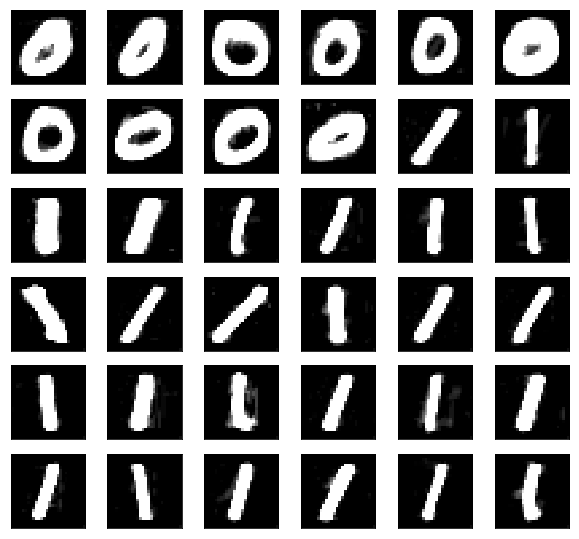

In [7]:
donneesKM = pd.concat([donneesKM0,donneesKM1])
afficheDigits(donneesKM.iloc[40:,1:],28)

In [32]:
from sklearn.cluster import KMeans

def calculKMensDonnees(donnees, label, clusters = 50):
    t0 = time.time()
    donneesK = pd.DataFrame()
    for i in range(10):
        d = donnees[label == i]

        kmeans = KMeans(n_clusters=clusters)
        kmeans.fit(d)
        #y_kmeans = kmeans.predict(d)
        df = pd.DataFrame(kmeans.cluster_centers_)
        df['label'] = i #np.ones(clusters)*i
        if i == 0 :
            donneesK = df.copy()
        else :
            donneesK = pd.concat([donneesK,df])       
    t1 = time.time()
    print('Exécution  :'+('%.2fs' % (t1 - t0)).lstrip('0'))
    return donneesK

In [15]:
donneesP50  = calculKMensDonnees(donneesP, label,50)
donneesR50  = calculKMensDonnees(donneesR, label,50)
donneesP100 = calculKMensDonnees(donneesP, label,100)
donneesR100 = calculKMensDonnees(donneesR, label,100)
donneesP150 = calculKMensDonnees(donneesP, label,150)
donneesR150 = calculKMensDonnees(donneesR, label,150)

Exécution  :62.05s
Exécution  :212.79s
Exécution  :82.25s
Exécution  :281.01s
Exécution  :97.88s
Exécution  :375.10s


In [22]:
donneesR.shape,donneesP.shape

((42000, 784), (42000, 169))

In [17]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(1)
clf.fit(donneesP50.iloc[:,:169], donneesP50.label)
Z = pd.DataFrame(clf.predict(donneesP),columns=["predict"])
Z["label"] = label    
Z.head()    

,predict,label
0,1,1
1,0,0
2,1,1
3,4,4
4,0,0


In [18]:
pd.crosstab(Z.predict,Z.label)

label,0,1,2,3,4,5,6,7,8,9
predict,,,,,,,,,,
0,4067,0,17,3,2,12,16,3,7,8
1,1,4645,26,11,26,6,7,28,24,4
2,9,6,4015,35,5,2,3,25,10,11
3,4,4,17,4085,1,44,1,2,47,26
4,2,8,5,3,3849,3,3,29,13,74
5,12,0,1,86,1,3654,22,2,62,11
6,28,2,11,4,29,25,4076,2,20,6
7,2,11,43,29,7,3,1,4208,11,73
8,4,2,32,61,3,26,8,3,3838,12


In [19]:
sum(Z.predict == Z.label)*100 / Z.count()[0]

96.19047619047619

In [20]:
Z.count()[0]

42000

In [36]:
from sklearn import neighbors

def calculKNNDonnees(X_train, X_test, y_train, y_test, voisins = 1):
    t0 = time.time()

    clf = neighbors.KNeighborsClassifier(voisins)
    clf.fit(X_train, y_train)

    Z = pd.DataFrame(clf.predict(X_test),columns=["predict"])
    Z["label"] = y_test
    t1 = time.time()
    print('Exécution  :'+('%.2fs' % (t1 - t0)).lstrip('0'))
    return Z

In [22]:
predP50 = calculKNNDonnees(donneesP50.iloc[:,:169],donneesP,donneesP50.label,label)
predR50 = calculKNNDonnees(donneesR50.iloc[:,:784],donneesR,donneesR50.label,label)
predP100 = calculKNNDonnees(donneesP100.iloc[:,:169],donneesP,donneesP100.label,label)
predR100 = calculKNNDonnees(donneesR100.iloc[:,:784],donneesR,donneesR100.label,label)
predP150 = calculKNNDonnees(donneesP150.iloc[:,:169],donneesP,donneesP150.label,label)
predR150 = calculKNNDonnees(donneesR150.iloc[:,:784],donneesR,donneesR150.label,label)

Exécution  :14.61s
Exécution  :61.93s
Exécution  :24.26s
Exécution  :120.49s
Exécution  :27.73s
Exécution  :152.80s


In [40]:
from sklearn.metrics import accuracy_score

def affichePrecissionModel(p):
    print(pd.crosstab(p.predict,p.label))
    print('--'*30)
    print(round((p.predict==p.label).sum() * 100 / p.label.count(),2))
    print(accuracy_score(p.predict,p.label)*100)
    print(accuracy_score(p.predict,p.label, normalize=False), p.label.count(), 
          accuracy_score(p.predict,p.label, normalize=False)*100/ p.label.count())    

In [24]:
affichePrecissionModel(predP50)

label       0     1     2     3     4     5     6     7     8     9
predict                                                            
0        4067     0    17     3     2    12    16     3     7     8
1           1  4645    26    11    26     6     7    28    24     4
2           9     6  4015    35     5     2     3    25    10    11
3           4     4    17  4085     1    44     1     2    47    26
4           2     8     5     3  3849     3     3    29    13    74
5          12     0     1    86     1  3654    22     2    62    11
6          28     2    11     4    29    25  4076     2    20     6
7           2    11    43    29     7     3     1  4208    11    73
8           4     2    32    61     3    26     8     3  3838    12
9           3     6    10    34   149    20     0    99    31  3963
------------------------------------------------------------
96.19
96.19047619047619
40400 42000 96.19047619047619


In [25]:
affichePrecissionModel(predR50)

label       0     1     2     3     4     5     6     7     8     9
predict                                                            
0        4063     0    16     3     3     5    20     3    10     8
1           0  4648    33    10    31     5     5    35    20    12
2          11     5  4022    35     0     1     3    27     9     4
3           3     7    18  4099     0    53     0     1    50    34
4           3     6     3     1  3850     3     2    24    10    84
5          10     1     1    72     1  3642    20     1    68     8
6          30     6     5     4    22    32  4078     2    16     2
7           1     5    36    15     7     6     0  4206    10    72
8           6     3    34    73     9    30     9     4  3850    18
9           5     3     9    39   149    18     0    98    20  3946
------------------------------------------------------------
96.2
96.2
40404 42000 96.2


In [26]:
affichePrecissionModel(predP100)

label       0     1     2     3     4     5     6     7     8     9
predict                                                            
0        4092     0    13     2     2     6     8     1     4     9
1           0  4664    23     5    29     3     4    32    16    10
2           6     4  4067    26     2     0     2    23     8     6
3           3     2     8  4181     1    34     0     2    29    15
4           2     5     5     3  3920     2     2    15     9    52
5           4     1     3    56     0  3695    13     1    45     4
6          16     3     2     2    14    24  4105     0    14     1
7           2     2    33    17     4     3     1  4261     7    65
8           4     2    16    35     1    15     2     1  3920    10
9           3     1     7    24    99    13     0    65    11  4016
------------------------------------------------------------
97.43
97.43095238095239
40921 42000 97.43095238095238


In [27]:
affichePrecissionModel(predR100)

label       0     1     2     3     4     5     6     7     8     9
predict                                                            
0        4097     0    14     1     3     4    15     0     6     7
1           0  4666    17     5    25     2     4    24    14     6
2           3     3  4074    23     1     0     2    20     6     6
3           3     3    11  4188     0    38     1     1    30    15
4           2     2     1     1  3925     1     4    11     7    48
5           4     1     6    58     2  3701    11     2    44     6
6          14     1     2     0    14    25  4096     0    17     2
7           3     5    29    13    10     4     0  4285     5    61
8           1     2    17    41     2     9     4     0  3912     9
9           5     1     6    21    90    11     0    58    22  4028
------------------------------------------------------------
97.55
97.55238095238096
40972 42000 97.55238095238096


In [28]:
affichePrecissionModel(predP150)

label       0     1     2     3     4     5     6     7     8     9
predict                                                            
0        4100     0    11     1     2     6     4     0     3     5
1           0  4668    17     1    16     3     3    24    14     5
2           7     2  4080    24     1     0     2    15     6     2
3           2     0    12  4230     1    27     0     1    24    10
4           2     1     2     1  3963     0     3    13     7    56
5           7     0     0    41     1  3722    10     1    33     9
6          10     2     2     1    11    21  4112     0    11     1
7           1     2    29     9     3     3     0  4296     6    46
8           1     3    19    25     2     5     3     0  3949    10
9           2     6     5    18    72     8     0    51    10  4044
------------------------------------------------------------
98.01
98.00952380952381
41164 42000 98.00952380952381


In [29]:
affichePrecissionModel(predR150)

label       0     1     2     3     4     5     6     7     8     9
predict                                                            
0        4103     0    12     2     2     4     8     1     4     6
1           0  4666    16     4    17     1     4    27    15     2
2           6     1  4086    20     0     0     2    12     6     4
3           1     3    10  4206     0    18     0     1    24    15
4           1     1     4     0  3975     1     4     8     8    43
5           4     0     4    55     1  3733    12     0    29     7
6          13     3     0     0    10    16  4102     0     7     3
7           0     3    20    18     3     0     1  4295     3    51
8           0     2    20    31     1     9     4     0  3950     8
9           4     5     5    15    63    13     0    57    17  4049
------------------------------------------------------------
98.01
98.01190476190477
41165 42000 98.01190476190476


In [30]:
pd.crosstab(predR150.predict,predR150.label)

label,0,1,2,3,4,5,6,7,8,9
predict,,,,,,,,,,
0,4103,0,12,2,2,4,8,1,4,6
1,0,4666,16,4,17,1,4,27,15,2
2,6,1,4086,20,0,0,2,12,6,4
3,1,3,10,4206,0,18,0,1,24,15
4,1,1,4,0,3975,1,4,8,8,43
5,4,0,4,55,1,3733,12,0,29,7
6,13,3,0,0,10,16,4102,0,7,3
7,0,3,20,18,3,0,1,4295,3,51
8,0,2,20,31,1,9,4,0,3950,8


In [31]:
round((predR150.predict==predR150.label).sum() * 100 / predR150.label.count(),2)

98.01